<a href="https://colab.research.google.com/github/AlaxanderLee/lecture_and_self-study/blob/master/2-1%20%ED%9B%88%EB%A0%A8%20%EC%84%B8%ED%8A%B8%EC%99%80%20%ED%85%8C%EC%8A%A4%ED%8A%B8%20%EC%84%B8%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2-1 훈련 세트와 테스트 세트

## 훈련 세트와 테스트 세트 준비

In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]

fish_target = [1] * 35 + [0] * 14

print(fish_data)
print(fish_target)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [4]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

In [5]:
# 0번째부터 34번째까지 데이터로 훈련 세트를 생성함. (35개 도미 데이터)
train_input = fish_data[:35]
train_target = fish_target[:35]

# 35부터 마지막까지 데이터로 테스트 세트를 생성함. (14개 빙어 데이터)
test_input = fish_data[35:]
test_target = fish_target[35:]

### 훈련 및 평가와 샘플링 편향

In [19]:
# 훈련 세트로 모델을 훈련함.
kn = kn.fit(train_input, train_target)

# 테스트 세트로 평가함.
print(kn.score(test_input, test_target))
"""
섞지 않고 도미로만 훈련하고 빙어로만 평가하니까 당연히 0이 나옴.
훈련 세트와 테스트 세트에 샘플이 골고루 섞여 있지 않으면 '샘플링 편향'
"""

1.0


"\n섞지 않고 도미로만 훈련하고 빙어로만 평가하니까 당연히 0이 나옴.\n훈련 세트와 테스트 세트에 샘플이 골고루 섞여 있지 않으면 '샘플링 편향'\n"

### 넘파이(Numpy)

In [7]:
import numpy as np

input_arr = np.array(fish_data) # 2차원
target_arr = np.array(fish_target) # 1차원

print(input_arr) 
print(target_arr) 
print(input_arr.shape)
print(target_arr.shape)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
(49, 2)
(49,)


### 무작위로 샘플 선택 후 훈련 세트와 테스트 세트 생성

In [8]:
"""
샘플을 무작위로 섞어서 훈련 세트 및 테스트 세트를 만들어야 함.
인덱스를 섞고 input_arr와 target_arr에 적용하여 샘플을 선택하면 무작위로 훈련 세트를 나누는 것임.
"""
np.random.seed(42) # seed를 설정하면 섞인 숫자가 항상 같게 출력됨. 지정하는 숫자에 따라 배열이 정해짐.

index = np.arange(49)

np.random.shuffle(index) # index를 섞어서 아예 index를 바꿔버리는 함수임. 

print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [9]:
# 배열 인덱싱. (콕콕 집어서 출력함.)
print(input_arr[[1, 3]])
print(input_arr[[13, 45, 44]])

[[ 26.3 290. ]
 [ 29.  363. ]]
[[ 32.  340. ]
 [ 12.4  13.4]
 [ 12.2  12.2]]


In [10]:
# 섞은 index를 input_arr에 적용하여 배열 인덱싱 함. 훈련 세트를 생성함.
train_input = input_arr[index[:35]]

train_target = target_arr[index[:35]]

print(train_input)
print(train_target)

[[  32.   340. ]
 [  12.4   13.4]
 [  14.3   19.7]
 [  12.2   12.2]
 [  33.   700. ]
 [  36.   714. ]
 [  35.   720. ]
 [  35.   725. ]
 [  38.5  955. ]
 [  33.5  650. ]
 [  31.5  500. ]
 [  29.   430. ]
 [  41.   950. ]
 [  30.   450. ]
 [  29.   363. ]
 [  29.7  500. ]
 [  11.3    8.7]
 [  11.8   10. ]
 [  13.    12.2]
 [  32.   600. ]
 [  30.7  500. ]
 [  33.   700. ]
 [  35.   700. ]
 [  41.   975. ]
 [  38.5  920. ]
 [  25.4  242. ]
 [  12.     9.8]
 [  39.5  925. ]
 [  29.7  450. ]
 [  37.  1000. ]
 [  31.   500. ]
 [  10.5    7.5]
 [  26.3  290. ]
 [  34.   685. ]
 [  26.5  340. ]]
[1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1]


In [11]:
# 섞은 index를 input_arr에 적용하여 배열 인덱싱 함. 테스트 세트를 생성함.
test_input = input_arr[index[35:]]

test_target = target_arr[index[35:]]

print(test_input)
print(test_target)

[[ 10.6   7. ]
 [  9.8   6.7]
 [ 35.  680. ]
 [ 11.2   9.8]
 [ 31.  475. ]
 [ 34.5 620. ]
 [ 33.5 610. ]
 [ 15.   19.9]
 [ 34.  575. ]
 [ 30.  390. ]
 [ 11.8   9.9]
 [ 32.  600. ]
 [ 36.  850. ]
 [ 11.    9.7]]
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


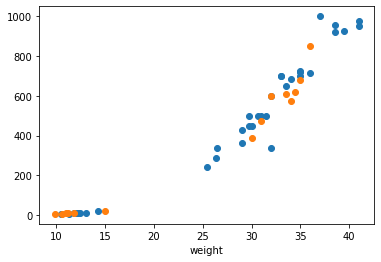

In [12]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1]) # train_input[:, 0]: train_input의 전체 데이터에서 1번째 특성을 x축에, 2번째 특성을 y축에 설정함. 
plt.scatter(test_input[:, 0], test_input[:, 1])

plt.xlabel('length')
plt.xlabel('weight')

plt.show()

## 모델 훈련 및 평가

In [13]:
kn = kn.fit(train_input, train_target)

kn.score(test_input, test_target)

1.0

In [14]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [15]:
print(test_target) # kn.predict로 예측한 값과 같음.

[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


## 마무리

### 키워드로 끝내는 핵심 포인트

- 테스트 세트: 전체 데이터에서 대체로 **20~30%**를 테스트 세트로 사용함. 전체 데이터가 아주 크면 **1%**만 사용해도 충분함.

### 핵심 패키지와 함수

In [16]:
# shuffle 함수의 경우 다차원 배열이면 행만 섞음. 열은 안 섞음.
arr = np.array([[1, 2], [3, 4], [5, 6]])

np.random.shuffle(arr)

print(arr)

[[5 6]
 [1 2]
 [3 4]]
